In [1]:
from fenics import *
import pylab as plt 
import numpy as np
parameters.plotting_backend = 'matplotlib'
get_ipython().magic(u'matplotlib inline')
%matplotlib inline

In [2]:
mesh = UnitIntervalMesh(100)

V = FunctionSpace(mesh,'CG',1)

def cl(x,on_boundary):
    return on_boundary and near(x[0],0.)
bc = DirichletBC(V,0.,cl)

k0 = -0.0001

L1 = (11.8e-2)/2
E1 = 1.3e6
b1 = 4.e-2
h1 = 0.7e-2
I1 = b1*(h1**3)/12.

dF = 0.01

theta0 = interpolate(Expression("pi/2+k0*x[0]",k0=k0,degree=1),V)

max1=[]
max2=[]
FF1=[]

AttributeError: 'module' object has no attribute 'create_ffc_form_dfd94f65898019074e8cf97a41f69af44e3fa4f2_form_0'

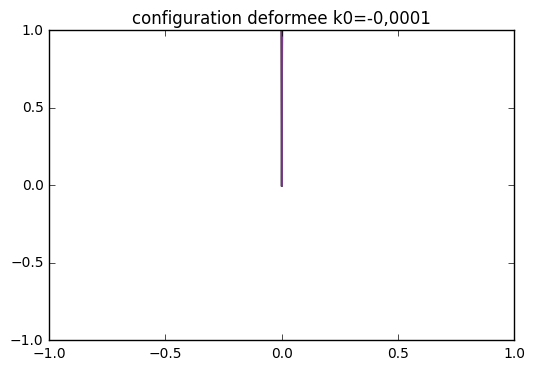

In [3]:
for F1 in np.linspace(0.,3.):
    lam = F1*(L1**2.)/(E1*I1)
    
    theta0 = interpolate(theta0,V)
    
    thetat = TestFunction(V)
    delta_theta = TrialFunction(V)
      
    a_k = inner(delta_theta.dx(0),thetat.dx(0))*dx
    a_g = inner(delta_theta,(sin(theta0))*thetat)*dx
    a_n = a_k-lam*a_g
    l_n = Constant(-1.)*(inner((theta0.dx(0)-k0),thetat.dx(0)) + lam*inner(cos(theta0),thetat))*dx

    tol = 1e-10
    iter = 0
    maxiter = 100
    err = 100.
    while err > tol and iter < maxiter:
        dtheta = Function(V)
        solve(a_n==l_n,dtheta,bc)
        L = assemble(l_n)
        err = norm(L)
        theta0.assign(theta0+dtheta)
        bc.apply(L)
        iter = iter+1
        
    def xy_shape(theta0):
        VXY = VectorFunctionSpace(mesh,'P',1,dim = 2)
        (X,Y) = TrialFunctions(VXY)
        (X_chap,Y_chap) = TestFunctions(VXY)
        bc = DirichletBC(VXY, (0.,0.), "x[0] == 0.")
        a_x = X.dx(0)*X_chap*dx
        L_x = cos(theta0)*X_chap*dx
        a_y = Y.dx(0)*Y_chap*dx
        L_y = sin(theta0)*Y_chap*dx
        xy = Function(VXY)
        solve(a_x + a_y == L_x + L_y, xy, bc)
        return xy
        
    def xy_vertex_values(xy):
        (xs,ys) = xy.split(deepcopy=True) 
        xsv = xs.compute_vertex_values()
        ysv = ys.compute_vertex_values()
        return (xsv, ysv)

    def plot_shape(theta0):
        (xsv, ysv) = xy_vertex_values(xy_shape(theta0))
        myplot = plt.plot(xsv,ysv)
        plt.ylim([-1.,1.])
        plt.xlim([-1.,1.])
        return myplot
        
    (x1, y1) = xy_vertex_values(xy_shape(theta0))
    max1.append(max(abs(x1)))
    max2.append(-1.*max(abs(x1)))
    FF1.append(F1)
    
    F1 = F1 + dF

    plot_shape(theta0)
    plt.figure(1)
    plt.title('configuration deformee k0=-0,0001')
    plt.savefig('condinit001.png')
plt.show()

In [ ]:
plt.figure(2)
plt.plot(max1,FF1)
plt.xlabel('deplacement')
plt.ylabel('force (N)')
plt.title('force-deplacement k=-0,0001')
plt.savefig('Fodep001.png')

In [ ]:
plt.figure(3)
plt.plot(FF1,max1)
plt.plot(FF1,max2)
plt.xlabel('force (N)')
plt.ylabel('deplacement')
plt.title('diagramme bifurcation k=-0,0001')
plt.savefig('bifur001.png')